<a href="https://colab.research.google.com/github/arclive202/COVID19proj/blob/master/CovidAnalytics_Indiav2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Performing Analaytics on COVID-19 Dataset statewise and comparing them for different statistics.

Importing the packages required to run this notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime
from google.colab import files
import folium


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###Data Preprocessing

Setting up the Dataframe and the proceeding to clean the data. 

In [3]:
india_data_url="https://www.mohfw.gov.in/data/datanew.json"
india_data = pd.read_json(india_data_url)
india_data.head()

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
0,2,Andaman and Nicobar Islands,677,2945,2231,37,635,2985,2309,41,35
1,1,Andhra Pradesh,89932,371639,278247,3460,92208,382469,286720,3541,28
2,3,Arunachal Pradesh,899,3412,2508,5,987,3555,2563,5,12
3,4,Assam,19518,94592,74814,260,19535,96771,76962,274,18
4,5,Bihar,19716,124536,104301,519,19823,126714,106361,530,10


The last row contains the sum or aggregate of the data of all the states.
This Data can be stored in a separate variable for additional use.

In [4]:
india_data.index

RangeIndex(start=0, stop=37, step=1)

In [5]:
india_data.tail(1)

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
36,11111,,707267,3234474,2467758,59449,725991,3310234,2523771,60472,


In [6]:
india_aggregate = india_data.iloc[-1]
print(india_aggregate)

sno               11111
state_name             
active           707267
positive        3234474
cured           2467758
death             59449
new_active       725991
new_positive    3310234
new_cured       2523771
new_death         60472
state_code             
Name: 36, dtype: object


We can now delete the final row from the dataframe so that it doesnot cause any anamoly in our data estimations

In [7]:
india_data.drop(india_data.tail(1).index,inplace=True)

Now that the final row of the data has been deleted we can use the 'describe()' to get a general sense of the data we are dealing with

Remeber we have the aggregate values stored in a variable for later use.

In [8]:
india_data.describe()

,sno,active,positive,cured,death,new_active,new_positive,new_cured,new_death
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,19.277778,19646.305556,89846.500000,68548.833333,1651.361111,20166.416667,91950.944444,70104.750000,1679.777778
std,10.843329,33097.473094,145498.533991,110240.553720,3980.216176,34210.983344,148663.889388,112301.360272,4033.827860
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.750000,1326.500000,3667.000000,2585.250000,28.500000,1401.250000,3722.250000,2599.000000,30.250000
50%,19.500000,9438.500000,32874.500000,23491.000000,252.000000,9966.000000,33763.000000,24271.000000,265.500000
75%,28.250000,20111.000000,98866.000000,77416.250000,1199.750000,20469.250000,101199.000000,79245.250000,1234.750000
max,37.000000,166239.000000,703823.000000,514790.000000,22794.000000,173195.000000,718711.000000,522427.000000,23089.000000


As we can see from the above data that there are 36 rows accross all columns, and by looking at the rest of the data we can conclude that there are no NaN values in the dataset

We can now set the states column as an Index and proceed further to gather data of the max and min states from each category.

In [21]:
#india_data.set_index('state_name')

#The sno column is no use to us as well. So we might as well proceed and drop that column

#india_data.drop(columns='sno',inplace=True)

india_data.head()

,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
0,Andaman and Nicobar Islands,677,2945,2231,37,635,2985,2309,41,35
1,Andhra Pradesh,89932,371639,278247,3460,92208,382469,286720,3541,28
2,Arunachal Pradesh,899,3412,2508,5,987,3555,2563,5,12
3,Assam,19518,94592,74814,260,19535,96771,76962,274,18
4,Bihar,19716,124536,104301,519,19823,126714,106361,530,10


In [10]:
india_data.head()

,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
0,Andaman and Nicobar Islands,677,2945,2231,37,635,2985,2309,41,35
1,Andhra Pradesh,89932,371639,278247,3460,92208,382469,286720,3541,28
2,Arunachal Pradesh,899,3412,2508,5,987,3555,2563,5,12
3,Assam,19518,94592,74814,260,19535,96771,76962,274,18
4,Bihar,19716,124536,104301,519,19823,126714,106361,530,10


Loading CSV files which contains statewise latitudes and Longitudes for GeoSpatial Analysis

In [14]:
#Loaded the data of the 2011 statewise centroid, had to make adjustments to columns to factor in for the newly added states and union territories.
files.upload()
# accepted filename: datasets_7536_10717_state wise centroids_2011.csv

Saving Latitude and Longitude State wise centroids 2020.csv to Latitude and Longitude State wise centroids 2020.csv


{'Latitude and Longitude State wise centroids 2020.csv': b'ilist,State,Longitude,Latitude\n0,Andaman and Nicobar Islands,92.88957895607237,11.942373315646947\n1,Andhra Pradesh,79.74,15.9129\n2,Arunachal Pradesh,94.54532681056138,27.72576541518621\n3,Assam,92.65731035572504,26.321340891915746\n4,Bihar,85.6367740131486,25.771393543753963\n5,Chandigarh,76.75872466,30.7426\n6,Chhattisgarh,82.12509333594426,21.55573858298405\n7,Dadra and Nagar Haveli,73.09454961,20.21513217\n8,Daman and Diu,72.41121190648654,20.494569789560284\n9,Delhi,77.12804518,28.645944300000004\n10,Goa,73.86601625846721,15.393504042993381\n11,Gujarat,72.19574738883901,22.37440584958047\n12,Haryana,76.52123742961845,29.195616276383877\n13,Himachal Pradesh,76.85561813540754,31.6494688754927\n14,Jammu and Kashmir,75.00063061643165,33.651699000229414\n15,Jharkhand,85.85996246441698,23.76750554674568\n16,Karnataka,76.29962467945006,14.369817089467844\n17,Kerala,76.21770621006371,10.32670635609908\n18,Ladakh,77.577049,34.152

In [15]:

#kaggle datasets download -d adityarc/india-state-wise-latitudes-and-longitudes-2020
statewise_geodata = pd.read_csv("Latitude and Longitude State wise centroids 2020.csv")
statewise_geodata.head()

,ilist,State,Longitude,Latitude
0,0,Andaman and Nicobar Islands,92.889579,11.942373
1,1,Andhra Pradesh,79.740000,15.912900
2,2,Arunachal Pradesh,94.545327,27.725765
3,3,Assam,92.657310,26.321341
4,4,Bihar,85.636774,25.771394


Now that we have the statewise Latitudes and Longitudes, we need to see for any anamoly in the state names while comparing to the india_data dataframe.

Since the Data is different from the 2011 census data. The new states as well as the union territories data have to be explicitly added.

In [22]:
print(len(india_data)," ",len(statewise_geodata))

36   37


In [25]:
#Changing the Names to match with the india_data dataset

#statewise_geodata.State[0] = 'Andaman and Nicobar Islands'
##statewise_geodata.State[25] = 'Odisha'
#statewise_geodata.State[33] = 'Uttarakhand'
statewise_geodata

,ilist,State,Longitude,Latitude
0,0,Andaman and Nicobar Islands,92.889579,11.942373
1,1,Andhra Pradesh,79.740000,15.912900
2,2,Arunachal Pradesh,94.545327,27.725765
3,3,Assam,92.657310,26.321341
4,4,Bihar,85.636774,25.771394
5,5,Chandigarh,76.758725,30.742600
6,6,Chhattisgarh,82.125093,21.555739
7,7,Dadra and Nagar Haveli,73.094550,20.215132
8,8,Daman and Diu,72.411212,20.494570
9,9,Delhi,77.128045,28.645944


In [24]:
#Creating a list ranging from 0 to 36 which will be added as the index for our new list.

#list1 = list(range(0,37))
#print(list1)

In [ ]:
#appending two new rows to the statewisegeodata dataset
#temp_states = statewise_geodata.append(pd.DataFrame([['Telangana',79.019300,18.112400],['Ladakh',77.577049,34.152588]], columns=['State','Longitude','Latitude']))
#states_geo_data = temp_states.sort_values(by='State')

,State,Longitude,Latitude
0,Andaman and Nicobar Islands,92.889579,11.942373
1,Andhra Pradesh,79.740000,15.912900
2,Arunachal Pradesh,94.545327,27.725765
3,Assam,92.657310,26.321341
4,Bihar,85.636774,25.771394
5,Chandigarh,76.758725,30.742600
6,Chhattisgarh,82.125093,21.555739
7,Dadra and Nagar Haveli,73.094550,20.215132
8,Daman and Diu,72.411212,20.494570
9,Delhi,77.128045,28.645944


In [ ]:
#now that we have fixed the index issue from the previous output, we have a new dataframe with the data of all the states factored in
#states_geo_data['ilist']=list1
#states_geo_data.set_index('ilist',inplace=True)


In [27]:
#Clubbing the data for Dadra and Nagar Haveli and Daman and Diu, which is a requirement specific to india_data dataframe.
#covid_map_dat = states_geo_data.copy()
covid_map_dat = statewise_geodata.copy()
covid_map_dat.Latitude[7] = (covid_map_dat.Latitude[7] + covid_map_dat.Latitude[8]) / 2
covid_map_dat.Longitude[7] = (covid_map_dat.Longitude[7] + covid_map_dat.Longitude[8]) / 2
covid_map_dat.State[7]='Dadra and Nagar Haveli and Daman and Diu'


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
#This is the final version of the Indian Lat and Longitude statewise data which is going to be used.

covid_map_dat

,ilist,State,Longitude,Latitude
0,0,Andaman and Nicobar Islands,92.889579,11.942373
1,1,Andhra Pradesh,79.740000,15.912900
2,2,Arunachal Pradesh,94.545327,27.725765
3,3,Assam,92.657310,26.321341
4,4,Bihar,85.636774,25.771394
5,5,Chandigarh,76.758725,30.742600
6,6,Chhattisgarh,82.125093,21.555739
7,7,Dadra and Nagar Haveli and Daman and Diu,72.752881,20.354851
9,9,Delhi,77.128045,28.645944
10,10,Goa,73.866016,15.393504


In [31]:
covid_map_dat.drop([8],inplace=True)

## Data Analytics

Now that we have finished with the preprocessing of the data, we can move further ahead with doing some analysis based off of some of our own criterias.

Total Number of Current Cases in India.

In [34]:
print("The Total Number of Current cases in India are as follows:\nCurrent Active Cases:\t{0}\nTotal Number of Positives recorded:\t{1}\nTotal Number of people Cured:\t{2}\nTotal Number of deaths:\t{3}".format(india_aggregate['new_active'],india_aggregate['new_positive'],india_aggregate['new_cured'],india_aggregate['new_death']))

The Total Number of Current cases in India are as follows:
Current Active Cases:	725991
Total Number of Positives recorded:	3310234
Total Number of people Cured:	2523771
Total Number of deaths:	60472


In [35]:
india_data.set_index('state_name',inplace=True)


1a. states sorted by order of current active 

1b. States were the number of active cases have increased.

1c. States were the number of active cases have decreased.

1d. Bar plot for the top ten states with Highest Active Cases.

In [36]:
#1a.
india_data.sort_values(by=['new_active'],ascending=False)['new_active'].head()
#print("\n\n")

state_name
Maharashtra       173195
Andhra Pradesh     92208
Karnataka          83627
Tamil Nadu         52362
Uttar Pradesh      51317
Name: new_active, dtype: int64

In [37]:
#1b
temp_data = india_data.copy()
temp_data['Change in Active'] = temp_data['new_active'] - temp_data['active']

for v in temp_data.sort_values(by=['Change in Active'],ascending=False).index:
  if temp_data.loc[v]['Change in Active'] > 0:
    print(v," increased by ",temp_data.loc[v]['Change in Active'])
  elif temp_data.loc[v]['Change in Active'] == 0:
    print("The number of active cases in ",v,"remains the same")




  

Maharashtra  increased by  6956
Andhra Pradesh  increased by  2276
Telengana  increased by  1915
Uttar Pradesh  increased by  1742
Karnataka  increased by  1198
Kerala  increased by  1112
Chhattisgarh  increased by  786
Delhi  increased by  522
Punjab  increased by  386
Puducherry  increased by  283
Haryana  increased by  269
Tripura  increased by  260
Tamil Nadu  increased by  234
Uttarakhand  increased by  206
Goa  increased by  202
Gujarat  increased by  126
Manipur  increased by  123
Madhya Pradesh  increased by  111
Bihar  increased by  107
Himachal Pradesh  increased by  103
Jharkhand  increased by  97
Arunachal Pradesh  increased by  88
Jammu and Kashmir  increased by  86
Chandigarh  increased by  83
Nagaland  increased by  26
Assam  increased by  17
Odisha  increased by  15
The number of active cases in  Lakshadweep remains the same


In [38]:
#1c
for v in temp_data.sort_values(by=['Change in Active'],ascending=False).index:
  if temp_data.loc[v]['Change in Active'] < 0:
    print(v," decreased by ",str(temp_data.loc[v]['Change in Active']*-1))

Ladakh  decreased by  1
Mizoram  decreased by  9
Meghalaya  decreased by  10
Sikkim  decreased by  11
Dadra and Nagar Haveli and Daman and Diu  decreased by  17
Andaman and Nicobar Islands  decreased by  42
Rajasthan  decreased by  120
West Bengal  decreased by  395


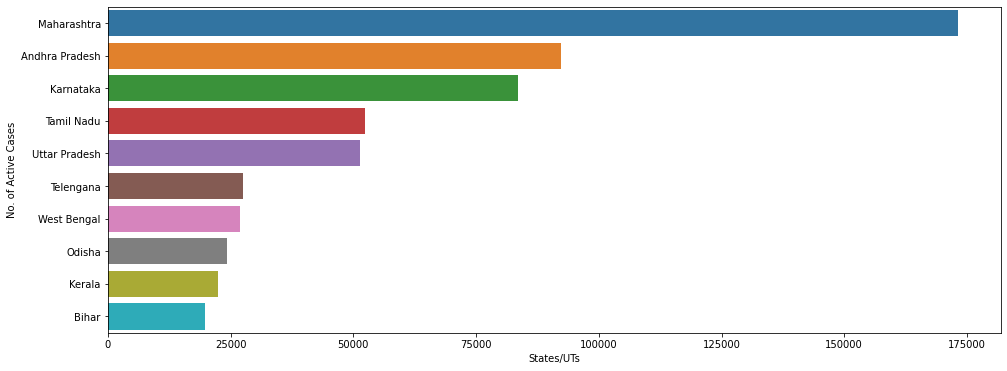

In [39]:
#1d
plt.figure(figsize=(16,6))
sns.barplot(x=india_data.sort_values(by=['new_active'],ascending=False)['new_active'].head(10),y=india_data.sort_values(by=['new_active'],ascending=False).head(10).index)
plt.xlabel("States/UTs")
plt.ylabel("No. of Active Cases")
plt.show()

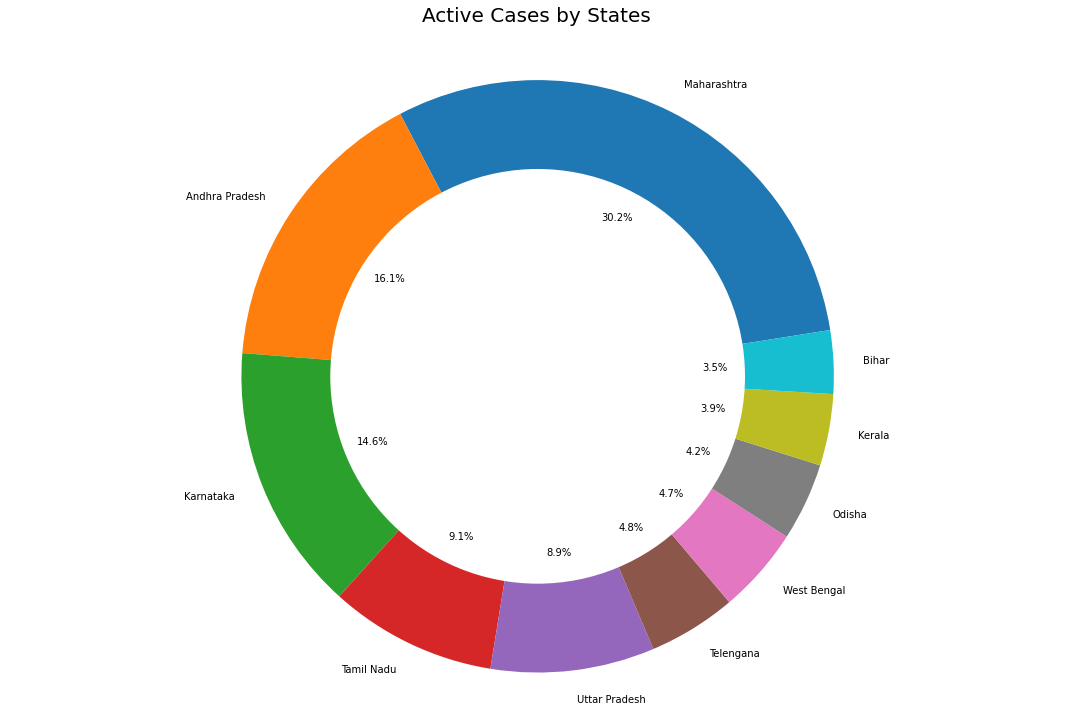

In [40]:

labels = list(india_data.sort_values(by=['new_active'],ascending=False)['new_active'].head(10))

plt.figure(figsize= (15,10))
plt.pie(labels, labels=india_data.sort_values(by=['new_active'],ascending=False).head(10).index, autopct='%1.1f%%', startangle=9)
centre_circle = plt.Circle((0,0),0.7,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Active Cases by States\n',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

2a. states sorted by order of current total Positives

2b. States were the number of Positive cases have increased.

2c. Bar plot for the top ten states with Highest Positive Cases.

In [41]:
#2a
india_data.sort_values(by=['new_positive'],ascending=False)['new_positive'].head()

state_name
Maharashtra       718711
Tamil Nadu        397261
Andhra Pradesh    382469
Karnataka         300406
Uttar Pradesh     203028
Name: new_positive, dtype: int64

In [42]:
#2b
temp_data = india_data.copy()
temp_data['Change in Positive'] = temp_data['new_positive'] - temp_data['positive']

for v in temp_data.sort_values(by=['Change in Positive'],ascending=False).index:
  if temp_data.loc[v]['Change in Positive'] > 0:
    print(v," increased by ",temp_data.loc[v]['Change in Positive'])
  elif temp_data.loc[v]['Change in Positive'] == 0:
    print("The number of Positive cases in ",v,"remains the same")




Maharashtra  increased by  14888
Andhra Pradesh  increased by  10830
Karnataka  increased by  8580
Tamil Nadu  increased by  5958
Uttar Pradesh  increased by  5640
Odisha  increased by  3371
West Bengal  increased by  2974
Telengana  increased by  2795
Kerala  increased by  2476
Assam  increased by  2179
Bihar  increased by  2178
Delhi  increased by  1693
Punjab  increased by  1513
Haryana  increased by  1397
Rajasthan  increased by  1345
Chhattisgarh  increased by  1209
Gujarat  increased by  1189
Jharkhand  increased by  1073
Madhya Pradesh  increased by  1064
Jammu and Kashmir  increased by  704
Uttarakhand  increased by  535
Puducherry  increased by  504
Goa  increased by  497
Tripura  increased by  385
Himachal Pradesh  increased by  167
Chandigarh  increased by  167
Arunachal Pradesh  increased by  143
Manipur  increased by  141
Andaman and Nicobar Islands  increased by  40
Meghalaya  increased by  32
Ladakh  increased by  31
Nagaland  increased by  26
Dadra and Nagar Haveli and 

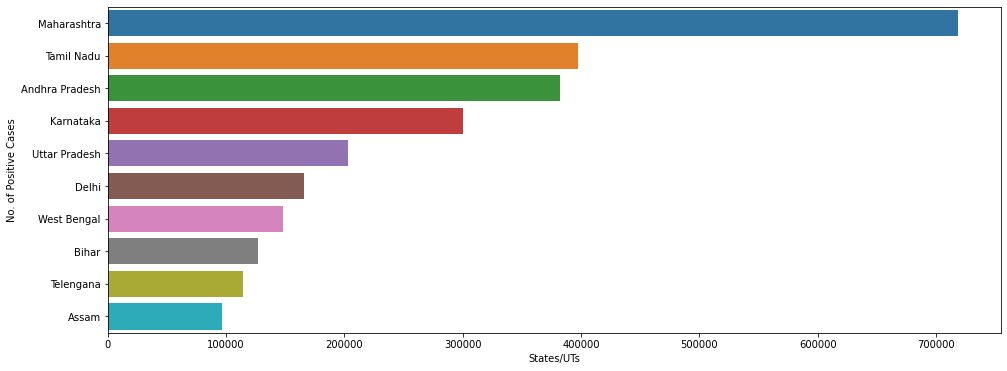

In [43]:
#2c
plt.figure(figsize=(16,6))
sns.barplot(x=india_data.sort_values(by=['new_positive'],ascending=False)['new_positive'].head(10),y=india_data.sort_values(by=['new_positive'],ascending=False).head(10).index)
plt.xlabel("States/UTs")
plt.ylabel("No. of Positive Cases")
plt.show()

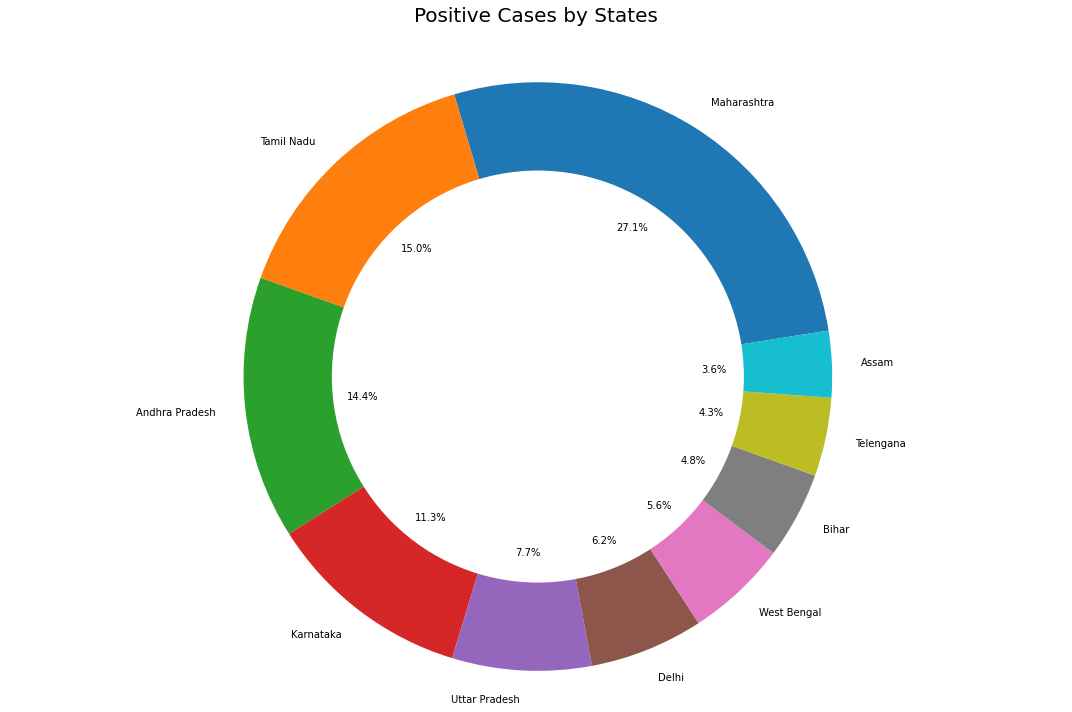

In [44]:

labels = list(india_data.sort_values(by=['new_positive'],ascending=False)['new_positive'].head(10))

plt.figure(figsize= (15,10))
plt.pie(labels, labels=india_data.sort_values(by=['new_positive'],ascending=False).head(10).index, autopct='%1.1f%%', startangle=9)
centre_circle = plt.Circle((0,0),0.7,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Positive Cases by States\n',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

3a. states sorted by order of current total number of people cured

3b. States were the number of people cured have increased.

3c. Bar plot for the top ten states with Highest number of people cured.

In [45]:
#3a
india_data.sort_values(by=['new_cured'],ascending=False)['new_cured'].head()

state_name
Maharashtra       522427
Tamil Nadu        338060
Andhra Pradesh    286720
Karnataka         211688
Delhi             148897
Name: new_cured, dtype: int64

In [46]:
#3b
temp_data = india_data.copy()
temp_data['Change in Cured'] = temp_data['new_cured'] - temp_data['cured']

for v in temp_data.sort_values(by=['Change in Cured'],ascending=False).index:
  if temp_data.loc[v]['Change in Cured'] > 0:
    print(v," increased by ",temp_data.loc[v]['Change in Cured'])
  elif temp_data.loc[v]['Change in Cured'] == 0:
    print("The number of Cured cases in ",v,"remains the same")




Andhra Pradesh  increased by  8473
Maharashtra  increased by  7637
Karnataka  increased by  7249
Tamil Nadu  increased by  5606
Uttar Pradesh  increased by  3808
Odisha  increased by  3343
West Bengal  increased by  3314
Assam  increased by  2148
Bihar  increased by  2060
Rajasthan  increased by  1453
Kerala  increased by  1351
Delhi  increased by  1154
Haryana  increased by  1117
Punjab  increased by  1086
Gujarat  increased by  1046
Jharkhand  increased by  961
Madhya Pradesh  increased by  936
Telengana  increased by  872
Jammu and Kashmir  increased by  599
Chhattisgarh  increased by  413
Uttarakhand  increased by  323
Goa  increased by  287
Puducherry  increased by  213
Tripura  increased by  123
Chandigarh  increased by  83
Andaman and Nicobar Islands  increased by  78
Himachal Pradesh  increased by  62
Arunachal Pradesh  increased by  55
Meghalaya  increased by  42
Dadra and Nagar Haveli and Daman and Diu  increased by  42
Ladakh  increased by  31
Sikkim  increased by  22
Manipu

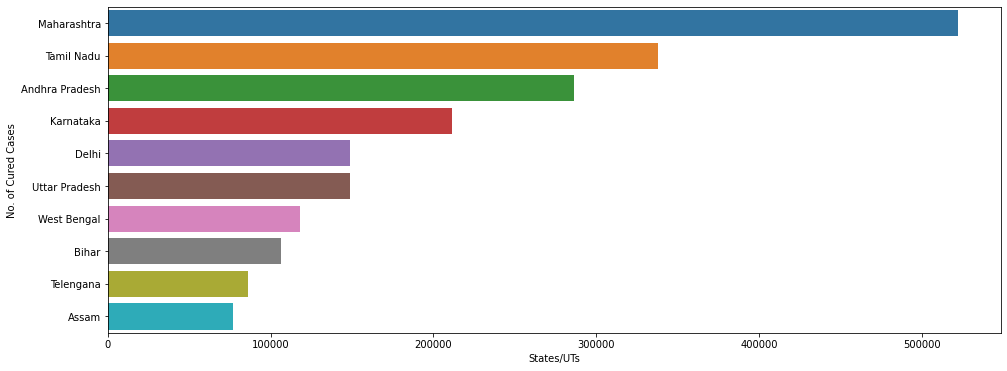

In [47]:
#3c
plt.figure(figsize=(16,6))
sns.barplot(x=india_data.sort_values(by=['new_cured'],ascending=False)['new_cured'].head(10),y=india_data.sort_values(by=['new_cured'],ascending=False).head(10).index)
plt.xlabel("States/UTs")
plt.ylabel("No. of Cured Cases")
plt.show()

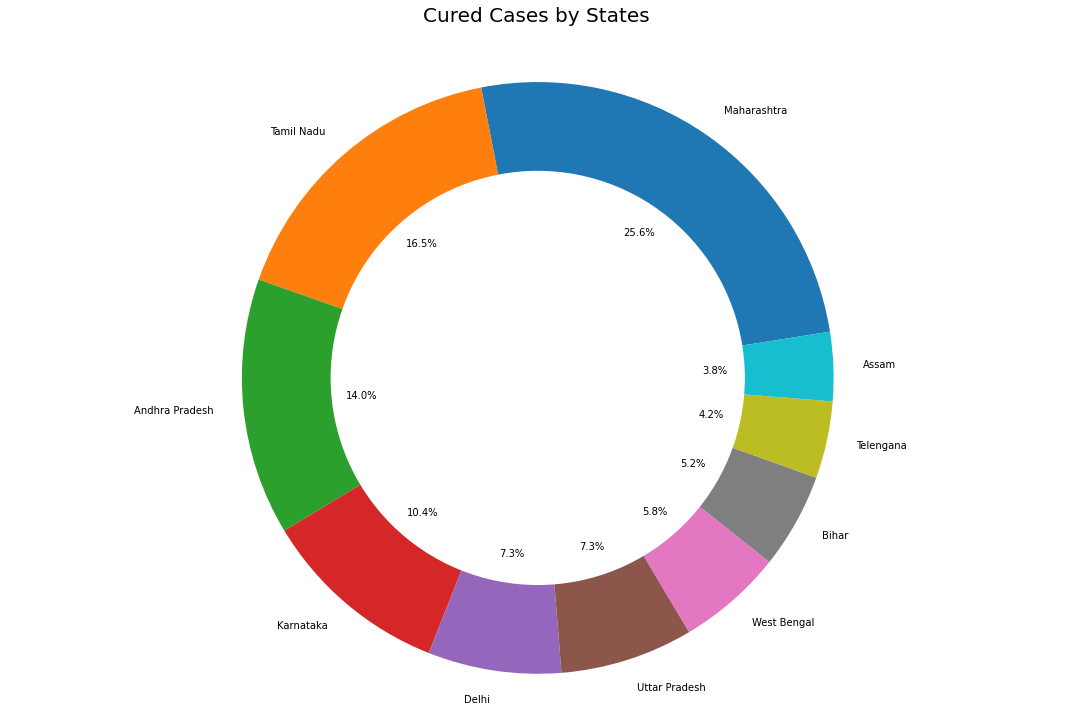

In [48]:

labels = list(india_data.sort_values(by=['new_cured'],ascending=False)['new_cured'].head(10))

plt.figure(figsize= (15,10))
plt.pie(labels, labels=india_data.sort_values(by=['new_cured'],ascending=False).head(10).index, autopct='%1.1f%%', startangle=9)
centre_circle = plt.Circle((0,0),0.7,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Cured Cases by States\n',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

4a. states sorted by order of current total number of people who died

4b. States were the number of deaths have increased.

4c. Bar plot for the top ten states with Highest number of deaths.

In [49]:
#4a
india_data.sort_values(by=['new_death'],ascending=False)['new_death'].head()

state_name
Maharashtra       23089
Tamil Nadu         6839
Karnataka          5091
Delhi              4347
Andhra Pradesh     3541
Name: new_death, dtype: int64

In [50]:
#4b
temp_data = india_data.copy()
temp_data['Change in Death'] = temp_data['new_death'] - temp_data['death']

for v in temp_data.sort_values(by=['Change in Death'],ascending=False).index:
  if temp_data.loc[v]['Change in Death'] > 0:
    print(v," increased by ",temp_data.loc[v]['Change in Death'])
  elif temp_data.loc[v]['Change in Death'] == 0:
    print("The number of Deaths in ",v,"remains the same")




Maharashtra  increased by  295
Karnataka  increased by  133
Tamil Nadu  increased by  118
Uttar Pradesh  increased by  90
Andhra Pradesh  increased by  81
West Bengal  increased by  55
Punjab  increased by  41
Jammu and Kashmir  increased by  19
Madhya Pradesh  increased by  17
Delhi  increased by  17
Gujarat  increased by  17
Jharkhand  increased by  15
Assam  increased by  14
Kerala  increased by  13
Odisha  increased by  13
Rajasthan  increased by  12
Haryana  increased by  11
Bihar  increased by  11
Chhattisgarh  increased by  10
Goa  increased by  8
Telengana  increased by  8
Puducherry  increased by  8
Uttarakhand  increased by  6
Andaman and Nicobar Islands  increased by  4
Himachal Pradesh  increased by  2
Tripura  increased by  2
Manipur  increased by  1
Ladakh  increased by  1
Chandigarh  increased by  1
The number of Deaths in  Nagaland remains the same
The number of Deaths in  Mizoram remains the same
The number of Deaths in  Meghalaya remains the same
The number of Deaths 

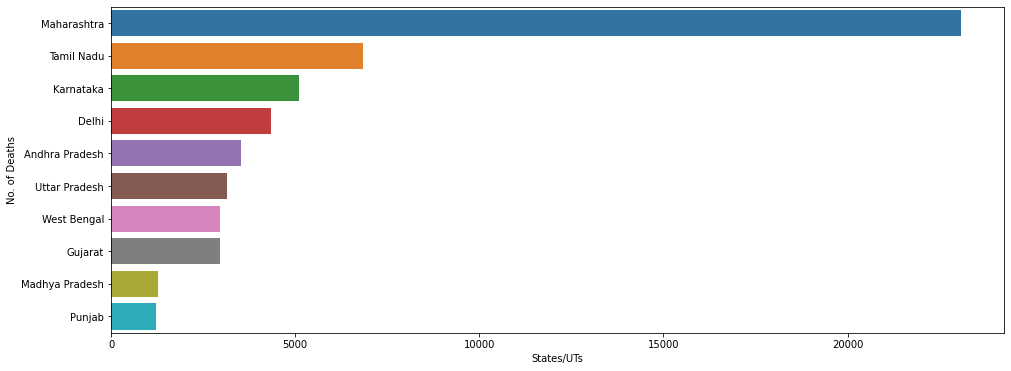

In [51]:
#4c
plt.figure(figsize=(16,6))
sns.barplot(x=india_data.sort_values(by=['new_death'],ascending=False)['new_death'].head(10),y=india_data.sort_values(by=['new_death'],ascending=False).head(10).index)
plt.xlabel("States/UTs")
plt.ylabel("No. of Deaths")
plt.show()

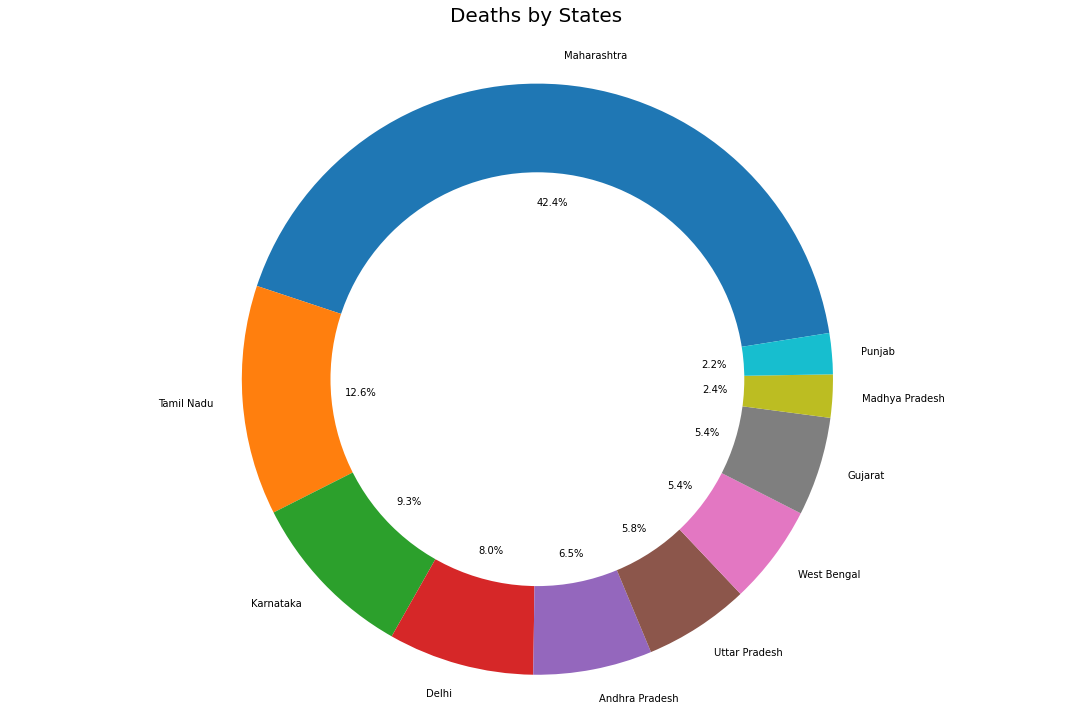

In [52]:

labels = list(india_data.sort_values(by=['new_death'],ascending=False)['new_death'].head(10))

plt.figure(figsize= (15,10))
plt.pie(labels, labels=india_data.sort_values(by=['new_death'],ascending=False).head(10).index, autopct='%1.1f%%', startangle=9)
centre_circle = plt.Circle((0,0),0.7,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Deaths by States\n',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

In [53]:
india_data.head()

,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
state_name,,,,,,,,,
Andaman and Nicobar Islands,677,2945,2231,37,635,2985,2309,41,35
Andhra Pradesh,89932,371639,278247,3460,92208,382469,286720,3541,28
Arunachal Pradesh,899,3412,2508,5,987,3555,2563,5,12
Assam,19518,94592,74814,260,19535,96771,76962,274,18
Bihar,19716,124536,104301,519,19823,126714,106361,530,10


In [54]:
input = "Karnataka"
india_data.loc[input]

active           82429
positive        291826
cured           204439
death             4958
new_active       83627
new_positive    300406
new_cured       211688
new_death         5091
state_code          29
Name: Karnataka, dtype: object

Now, Lets try and do some geo spatial analysis with our data

In [57]:


map_data = covid_map_dat.copy()

In [58]:
dir(folium)

['Choropleth',
 'Circle',
 'CircleMarker',
 'ClickForMarker',
 'ColorLine',
 'ColorMap',
 'CssLink',
 'CustomIcon',
 'Div',
 'DivIcon',
 'Element',
 'FeatureGroup',
 'Figure',
 'FitBounds',
 'GeoJson',
 'GeoJsonTooltip',
 'Html',
 'IFrame',
 'Icon',
 'JavascriptLink',
 'LatLngPopup',
 'LayerControl',
 'LinearColormap',
 'Link',
 'MacroElement',
 'Map',
 'Marker',
 'PolyLine',
 'Polygon',
 'Popup',
 'Rectangle',
 'RegularPolygonMarker',
 'StepColormap',
 'TileLayer',
 'Tooltip',
 'TopoJson',
 'Vega',
 'VegaLite',
 'WmsTileLayer',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'absolute_import',
 'branca',
 'division',
 'features',
 'folium',
 'map',
 'print_function',
 'raster_layers',
 'sys',
 'utilities',
 'vector_layers',
 'warnings']

In [59]:
#adding new columns to the map data which are to be passed as parameters for the folium map

list2 = list(india_data["new_positive"])
list3 = list(india_data["new_cured"])
list4 = list(india_data["new_death"])

map_data["new_positive"]=list2
map_data["new_cured"]=list3
map_data["new_death"]=list4


In [61]:
map_data["new_active"]=list(india_data["new_active"])
map_data

,ilist,State,Longitude,Latitude,new_positive,new_cured,new_death,new_active
0,0,Andaman and Nicobar Islands,92.889579,11.942373,2985,2309,41,635
1,1,Andhra Pradesh,79.740000,15.912900,382469,286720,3541,92208
2,2,Arunachal Pradesh,94.545327,27.725765,3555,2563,5,987
3,3,Assam,92.657310,26.321341,96771,76962,274,19535
4,4,Bihar,85.636774,25.771394,126714,106361,530,19823
5,5,Chandigarh,76.758725,30.742600,3376,1796,41,1539
6,6,Chhattisgarh,82.125093,21.555739,24550,14145,231,10174
7,7,Dadra and Nagar Haveli and Daman and Diu,72.752881,20.354851,2228,1862,2,364
9,9,Delhi,77.128045,28.645944,165764,148897,4347,12520
10,10,Goa,73.866016,15.393504,15027,11511,165,3351


In [62]:
center_lat = map_data.mean().Latitude
center_long = map_data.mean().Longitude

map1 = folium.Map(location=[center_lat, center_long], zoom_start=4.5,max_zoom=9,min_zoom=1)

for state in map_data["State"].unique():
  stateval=map_data[map_data["State"]==state]
  folium.CircleMarker(
      location=[stateval.Latitude.values[0],stateval.Longitude.values[0]],
      radius = float(stateval["new_active"].values[0]/2.5e3),
      popup="New Active Cases : %s"%stateval["new_active"].values[0],
      tooltip = stateval.State.values[0],
      color="blue",
      fill_color="blue").add_to(map1)

map1

In [63]:
map_data['new_positive']=list(india_data['new_positive'])

map_data


,ilist,State,Longitude,Latitude,new_positive,new_cured,new_death,new_active
0,0,Andaman and Nicobar Islands,92.889579,11.942373,2985,2309,41,635
1,1,Andhra Pradesh,79.740000,15.912900,382469,286720,3541,92208
2,2,Arunachal Pradesh,94.545327,27.725765,3555,2563,5,987
3,3,Assam,92.657310,26.321341,96771,76962,274,19535
4,4,Bihar,85.636774,25.771394,126714,106361,530,19823
5,5,Chandigarh,76.758725,30.742600,3376,1796,41,1539
6,6,Chhattisgarh,82.125093,21.555739,24550,14145,231,10174
7,7,Dadra and Nagar Haveli and Daman and Diu,72.752881,20.354851,2228,1862,2,364
9,9,Delhi,77.128045,28.645944,165764,148897,4347,12520
10,10,Goa,73.866016,15.393504,15027,11511,165,3351


In [ ]:
center_lat = map_data.mean().Latitude
center_long = map_data.mean().Longitude

map2 = folium.Map(location=[center_lat, center_long], zoom_start=4.5,max_zoom=6,min_zoom=2)

for state in map_data["State"].unique():
  stateval=map_data[map_data["State"]==state]
  folium.CircleMarker(
      location=[stateval.Latitude.values[0],stateval.Longitude.values[0]],
      radius = float(stateval["new_positive"].values[0]/1e4),
      popup="New Positive Cases : %s"%stateval["new_positive"].values[0],
      tooltip = stateval.State.values[0],
      color="orange",
      fill_color="orange").add_to(map2)

map2

In [ ]:
map_data['new_cured']=list(india_data['new_cured'])

map_data

,State,Longitude,Latitude,new_active,new_positive,new_cured
ilist,,,,,,
0,Andaman and Nicobar Islands,92.889579,11.942373,677,2945,2231
1,Andhra Pradesh,79.740000,15.912900,89932,371639,278247
2,Arunachal Pradesh,94.545327,27.725765,899,3412,2508
3,Assam,92.657310,26.321341,19518,94592,74814
4,Bihar,85.636774,25.771394,19716,124536,104301
5,Chandigarh,76.758725,30.742600,1456,3209,1713
6,Chhattisgarh,82.125093,21.555739,9388,23341,13732
7,Dadra and Nagar Haveli and Daman and Diu,72.752881,20.354851,381,2203,1820
9,Delhi,77.128045,28.645944,11998,164071,147743


In [ ]:
center_lat = map_data.mean().Latitude
center_long = map_data.mean().Longitude

map3 = folium.Map(location=[center_lat, center_long], zoom_start=4.5,max_zoom=9,min_zoom=1)

for state in map_data["State"].unique():
  stateval=map_data[map_data["State"]==state]
  folium.CircleMarker(
      location=[stateval.Latitude.values[0],stateval.Longitude.values[0]],
      radius = float(stateval["new_cured"].values[0]/1e4),
      popup="New Cured Cases : %s"%stateval["new_cured"].values[0],
      tooltip = stateval.State.values[0],
      color="green",
      fill_color="green").add_to(map3)

map3

In [ ]:
map_data['new_death']=list(india_data['new_death'])

map_data

,State,Longitude,Latitude,new_active,new_positive,new_cured,new_death
ilist,,,,,,,
0,Andaman and Nicobar Islands,92.889579,11.942373,677,2945,2231,37
1,Andhra Pradesh,79.740000,15.912900,89932,371639,278247,3460
2,Arunachal Pradesh,94.545327,27.725765,899,3412,2508,5
3,Assam,92.657310,26.321341,19518,94592,74814,260
4,Bihar,85.636774,25.771394,19716,124536,104301,519
5,Chandigarh,76.758725,30.742600,1456,3209,1713,40
6,Chhattisgarh,82.125093,21.555739,9388,23341,13732,221
7,Dadra and Nagar Haveli and Daman and Diu,72.752881,20.354851,381,2203,1820,2
9,Delhi,77.128045,28.645944,11998,164071,147743,4330


In [ ]:
center_lat = map_data.mean().Latitude
center_long = map_data.mean().Longitude

map4 = folium.Map(location=[center_lat, center_long], zoom_start=4.5,max_zoom=9,min_zoom=1)

for state in map_data["State"].unique():
  stateval=map_data[map_data["State"]==state]
  tip= stateval.State.values[0]+"\n"+str(stateval["new_death"].values[0])
  folium.CircleMarker(
      location=[stateval.Latitude.values[0],stateval.Longitude.values[0]],
      radius = float(stateval["new_death"].values[0]/5e2),
      popup="Number of Deaths : %s"%stateval["new_death"].values[0],
      tooltip = tip,
      color="red",
      fill_color="red").add_to(map4)

map4

Calculating the Statewise recover rate.

In [72]:
Recovery_data = india_data.copy()

Recovery_data["Recovery_rate"]=np.array(Recovery_data["new_cured"])/np.array(Recovery_data["new_positive"])*100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [73]:
Recovery_data.fillna(0,inplace=True)

In [75]:
Recovery_data

,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code,Recovery_rate
state_name,,,,,,,,,,
Andaman and Nicobar Islands,677,2945,2231,37,635,2985,2309,41,35,77.353434
Andhra Pradesh,89932,371639,278247,3460,92208,382469,286720,3541,28,74.965553
Arunachal Pradesh,899,3412,2508,5,987,3555,2563,5,12,72.095640
Assam,19518,94592,74814,260,19535,96771,76962,274,18,79.530024
Bihar,19716,124536,104301,519,19823,126714,106361,530,10,83.937844
Chandigarh,1456,3209,1713,40,1539,3376,1796,41,04,53.199052
Chhattisgarh,9388,23341,13732,221,10174,24550,14145,231,22,57.617108
Dadra and Nagar Haveli and Daman and Diu,381,2203,1820,2,364,2228,1862,2,26,83.572711
Delhi,11998,164071,147743,4330,12520,165764,148897,4347,07,89.824691


In [78]:
Recovery_order = Recovery_data.sort_values('Recovery_rate',ascending=False)
Recovery_order

In [84]:
Recovery_data["Cured_to_death_ratio"] = np.array(Recovery_data["new_cured"])/np.array(Recovery_data["new_death"])


Recovery_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [147]:
plotter = Recovery_data.copy()

  
graph_df = plotter.replace(np.inf,0)
graph_df.sort_values('Cured_to_death_ratio',ascending=False)